In [1]:
import sys
try:
    sys.path.remove("\\\\?\\C:\\Users\\andre\\Documents\\tracking_optimizations\\gpu-tracking")
except ValueError:
    pass
import gpu_tracking
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tifffile
import pandas as pd
import trackpy as tp

path = "../../emily_tracking/sample_vids/s_20.tif"
arr = tifffile.imread(path).astype("float32")#[None, ...]
coords = lambda df: df[["y", "x"]].to_numpy().T
from scipy.spatial import KDTree
# with open("centers.bin", "rb") as file:
#     data = file.read()
# last_dim = 2
# centers = np.frombuffer(data, dtype = "float32").reshape(524, 800, last_dim)
# with open("test", "rb") as file:
#     data = file.read()
# centers = np.frombuffer(data, dtype = "float32").reshape(524, 800, 2)
# centers = np.frombuffer(data, dtype = "float32").reshape(524, 800, last_dim)
# plt.imshow(centers[:, :, 0])

In [2]:
gpu_tracking.batch(arr, 9, points_to_characterize = np.array([[0, 200, 200], [1999, 300, 300]]), sig_radius = 5)

,frame,y,x,mass,raw_mass
0,0,200.0,200.0,499.213257,173156.0
1,1999,300.0,300.0,155.557007,173359.0


In [5]:
# gpu_tracking.batch(arr, 9, varcheck = 0)

,frame,y,x,mass
0,0,29.203270,356.062592,1265.947632
1,0,451.893250,332.532043,802.799500
2,0,167.818283,359.047089,649.178955
3,0,343.674774,363.886658,733.020142
4,0,461.972534,328.895874,535.365601
...,...,...,...,...
1842954,1999,450.829681,112.060493,616.438538
1842955,1999,111.393791,125.178253,615.724548
1842956,1999,137.822159,103.073257,649.816040
1842957,1999,270.194794,100.770203,754.743225


In [11]:
res = gpu_tracking.batch(arr, 9, minmass = 1000)

In [6]:
res = gpu_tracking.batch_file(path, 9, minmass = 1000)#, sig_radius = 4, bg_radius = 6, gap_radius = 0)

In [9]:
res

,frame,y,x,mass
0,0,230.782028,489.952545,1038.816162
1,0,364.652740,491.276093,1179.607910
2,0,223.373627,436.738495,1171.258057
3,0,236.900131,447.094727,2426.295166
4,0,279.898468,444.843018,1064.409546
...,...,...,...,...
251939,1999,150.080109,72.097557,1085.401978
251940,1999,94.094009,114.937057,1010.610229
251941,1999,134.065887,132.859039,1117.040283
251942,1999,155.965210,137.294434,1199.973633


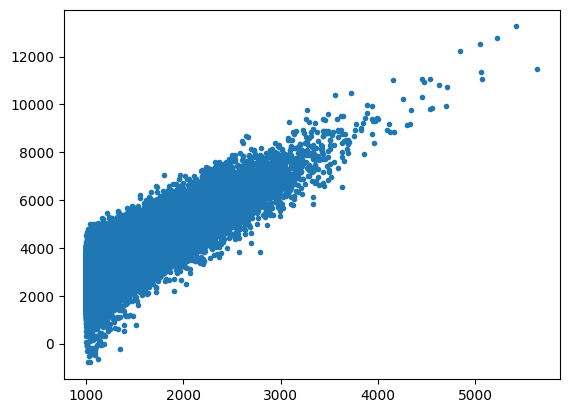

In [17]:
plt.plot(res.mass, res.raw_mass_corrected, ".")

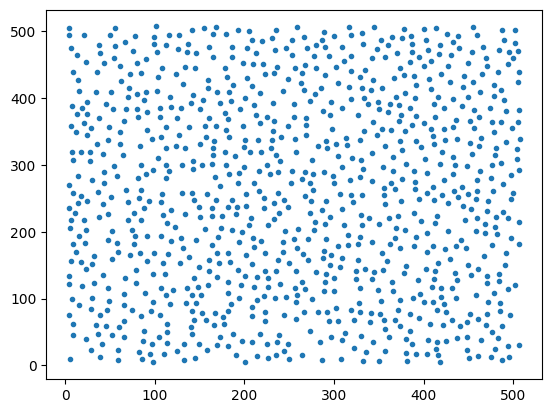

In [4]:
plt.plot(*(res[res["frame"] == 0][["y", "x"]].to_numpy().T), ".")

In [4]:
res2 = gpu_tracking.batch(arr, 9, points_to_characterize = res)

In [22]:
test = ~((res[idk.mass != 0][["y", "x"]].to_numpy().round().min(axis = 1) == 3) | (res[idk.mass != 0][["y", "x"]].to_numpy().round().max(axis = 1) == 508))

In [30]:
res[idk.mass != 0][test]

,frame,y,x,mass
70430,120,265.500000,128.123474,1429.225220
174926,296,494.463898,409.500000,689.115601
191562,324,12.748681,454.500000,564.665649
239713,406,360.500000,207.090164,872.524963
305683,517,433.986450,192.500000,668.750977
572340,967,183.284332,438.500000,465.221039
591157,999,376.500000,17.806026,621.676331
608186,1028,347.500000,19.974688,798.647278
689841,1166,311.500000,217.311630,918.281067
702299,1188,125.806686,313.500000,915.462463


In [31]:
res2[idk.mass != 0][test]

,frame,y,x,mass
70430,120,265.500000,128.123474,1423.123413
174926,296,494.463898,409.500000,726.001465
191562,324,12.748681,454.500000,764.777039
239713,406,360.500000,207.090164,833.038513
305683,517,433.986450,192.500000,668.426941
572340,967,183.284332,438.500000,460.465820
591157,999,376.500000,17.806026,636.869019
608186,1028,347.500000,19.974688,970.872803
689841,1166,311.500000,217.311630,888.937805
702299,1188,125.806686,313.500000,870.665039


In [6]:
idk.mass[idk.mass != 0]

4          49.165405
17         -0.525391
415        -8.679138
1194       29.052429
2236        4.721924
             ...    
1181038   -10.922485
1181444   -51.315002
1181696   -16.976624
1182060   -17.426270
1182374   -10.185181
Name: mass, Length: 3063, dtype: float64

(array([1.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 4.100e+01, 8.750e+02,
        2.067e+03, 7.600e+01, 0.000e+00, 2.000e+00]),
 array([-339.640625  , -285.66542358, -231.69022217, -177.71502075,
        -123.73981934,  -69.76461792,  -15.7894165 ,   38.18578491,
          92.16098633,  146.13618774,  200.11138916]),
 <BarContainer object of 10 artists>)

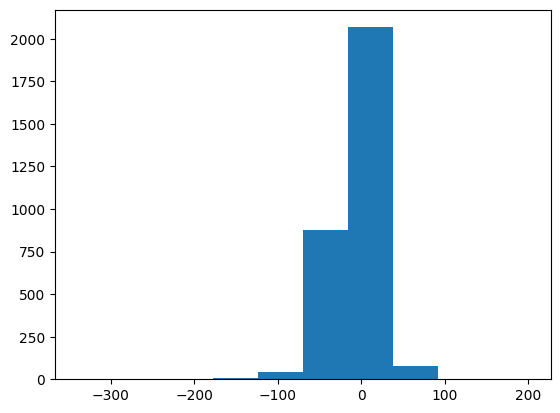

In [15]:
plt.hist(idk.mass[idk.mass != 0])

In [12]:
res[idk.mass != 0]

,frame,y,x,mass
17,0,117.095123,3.158003,518.990845
27,0,174.980026,2.910872,667.754700
569,1,507.648956,283.352692,782.539246
924,2,263.239868,507.786316,996.566101
1994,4,507.518646,118.926704,530.368713
...,...,...,...,...
1180763,1997,231.719208,507.517303,1267.752563
1181457,1998,148.347382,3.081594,847.100464
1181690,1998,501.811646,3.485564,642.640442
1182057,1999,3.375906,140.687851,1106.449219


In [ ]:
gpu_tracking.batch_file("../../emily_tracking/sample_vids/s_20.tif", 9, points_to_characterize= np.array([[300, 300]]))


In [275]:
# with open("trackpy_reference/locations.pkl", "rb") as file:
#     tp_df = pickle.load(file)
diameter = 9
minmass = 0
separation = 10
# n_frames = 2000
slc = slice(0, 2000)
my_df = pd.DataFrame(gpu_tracking.batch(arr[slc], diameter, minmass = minmass, separation = separation, filter_close = True), columns = ["frame", "mass", "y", "x"])
my_df = my_df.astype({"frame": int})[["frame", "y", "x", "mass"]]
tp.quiet()
tp_df = tp.batch(arr[slc], diameter, threshold = 0, percentile = 0, minmass = minmass, characterize = False, separation = separation)


NameError: name 'gpu_tracking' is not defined

In [2]:
from skimage.feature import blob_log

In [216]:
with open("dump1.bin", "rb") as file:
    n = np.frombuffer(file.read(), dtype = "int32")
n

array([215422], dtype=int32)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tifffile
from skimage.feature import peak_local_max
with open("dump0.bin", "rb") as file:
    data = np.frombuffer(file.read(), dtype = "int32")
    shape = (599, 697)
    # data = data[:np.prod(shape)]
    data = data.reshape(shape)
datalen = len(data)

with open("dump1.bin", "rb") as file:
    nparts = np.frombuffer(file.read(), dtype = "int32")
nparts = nparts[0]
# data = data[:datalen - datalen % 4]
# data = data.reshape(-1, 4)
# data = data[data.any(axis = 1)]
    # data = data[:9]
    # data = data.reshape(3, 3)
# image = tifffile.imread("scuffed_blobs_1C.tif")
# print(data.shape)
print(data[100*4:100*4+4])
print(data[100*4:100*4+4][2:].view("float32"))
print(data.any())
print(f"nparts = {nparts}")
data = data[:nparts*4].reshape(-1, 4)
data[:, :2]

idxs = np.hstack((np.round((data[:, 2].view(dtype = "float32") / np.sqrt(2) - 10) / (10/9)).astype(int).reshape(-1, 1), data[:, :2]))

ValueError: cannot reshape array of size 403744 into shape (599,697)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
with open("dump0.bin", "rb") as file:
    data = np.frombuffer(file.read(), dtype = "float32")
    shape = (592, 682)
    # data = data[:np.prod(shape)]
    data = data.reshape(shape)
datalen = len(data)

In [38]:
res = np.array([
   0.0,
    92.98627,
    95.96606,
    130442.75,
    16.666666,
    0.0,
    331.374,
    174.0605,
    97110.16,
    16.666666,
    0.0,
    522.9718,
    271.06754,
    106413.05,
    16.666666,
    0.0,
    182.85509,
    303.98438,
    122354.984,
    16.666666,
    0.0,
    80.20427,
    506.60687,
    115109.37,
    16.666666,
    0.0,
    231.9041,
    543.9776,
    78098.75,
    16.666666,
    0.0,
    484.09412,
    532.2603,
    58945.965,
    18.333332
]).reshape(-1, 5)

In [39]:
res[:, (1, 2, 4)]

array([[ 92.98627 ,  95.96606 ,  16.666666],
       [331.374   , 174.0605  ,  16.666666],
       [522.9718  , 271.06754 ,  16.666666],
       [182.85509 , 303.98438 ,  16.666666],
       [ 80.20427 , 506.60687 ,  16.666666],
       [231.9041  , 543.9776  ,  16.666666],
       [484.09412 , 532.2603  ,  18.333332]])

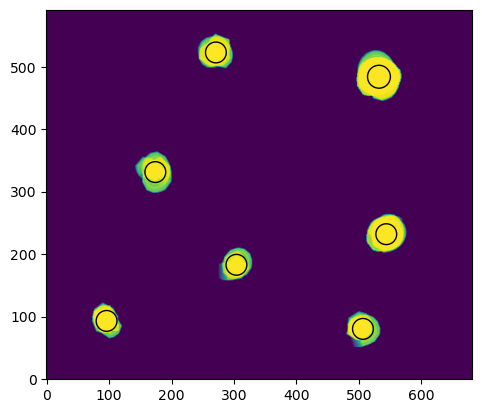

In [40]:
plt.imshow(tifffile.imread("scuffed_blobs_1C_even_dims.tif"), origin="lower")
[plt.gca().add_patch(plt.Circle((x, y), r, fill = False)) for y, x, r in res[:, (1, 2, 4)]]

# plt.plot(res[:, 2], res[:, 1], "o")
# pass

In [5]:
from skimage.feature.blob import _prune_blobs

In [33]:
blobs = np.array([
    [2, 0, 1/np.sqrt(2)],
    [0, 0, 2/np.sqrt(2)],
    [3, 0, 0.5/np.sqrt(2)],
    ])

# sigma = blobs[:, 1].max()
# distance = 2 * sigma * math.sqrt(blobs_array.shape[1] - sigma_dim)
# tree = spatial.cKDTree(blobs_array[:, :-sigma_dim])

In [34]:
_prune_blobs(blobs, 0)

array([[0.        , 0.        , 1.41421356],
       [3.        , 0.        , 0.35355339]])

In [317]:
facit

array([[  9, 232, 544],
       [  8, 523, 271],
       [  6,  93,  96],
       [  7,  80, 506],
       [  6, 183, 304],
       [  9, 331, 175],
       [  9, 483, 532]], dtype=int64)

In [318]:
idxs

array([[  6,  93,  96],
       [  6, 183, 304],
       [  7,  80, 506],
       [  8, 523, 271],
       [  9, 331, 175],
       [  9, 483, 532],
       [  9, 232, 544]])

In [319]:
imgs = []
for i in range(3):
    with open(f"dump{i}.bin", "rb") as file:
        imgs.append(np.frombuffer(file.read(), dtype = "float32").reshape(shape))
imgs = np.stack(imgs)

ValueError: cannot reshape array of size 403744 into shape (599,697)

In [278]:
idxs

array([[  6,  93,  96],
       [  6, 183, 304],
       [  7,  80, 506],
       [  8, 523, 271],
       [  9, 331, 175],
       [  9, 483, 532],
       [  9, 232, 544]])

In [272]:
cube = np.load("_sep_version.npy")
facit = peak_local_max(cube, threshold_abs = 0.2, exclude_border = (0, False, False))
facit

array([[  9, 232, 544],
       [  8, 523, 271],
       [  6,  93,  96],
       [  7,  80, 506],
       [  6, 183, 304],
       [  9, 331, 175],
       [  9, 483, 532]], dtype=int64)

In [223]:
diff = np.array(list({tuple(row) for row in idxs} - {tuple(row) for row in facit}))

In [273]:
facit[facit[:, 0].argsort()]

array([[  6,  93,  96],
       [  6, 183, 304],
       [  7,  80, 506],
       [  8, 523, 271],
       [  9, 232, 544],
       [  9, 331, 175],
       [  9, 483, 532]], dtype=int64)

In [274]:
idxs[idxs[:, 0].argsort()]

array([[  6,  93,  96],
       [  6, 183, 304],
       [  7,  80, 506],
       [  8, 523, 271],
       [  9, 331, 175],
       [  9, 483, 532],
       [  9, 232, 544]])

In [226]:
diff

array([[  9,  93,  96],
       [  9, 183, 304],
       [  9,  80, 507],
       [  9, 523, 271]])

In [227]:
idx = diff[0]
print(idx)
print()
print(cube[idx[0] - 1, idx[1] - 1: idx[1] + 2, idx[2] - 1: idx[2] + 2] - cube[idx[0], idx[1], idx[2]])
print()
print(cube[idx[0], idx[1] - 1: idx[1] + 2, idx[2] - 1: idx[2] + 2] - cube[idx[0], idx[1], idx[2]])
print()
print(cube[idx[0] + 1, idx[1] - 1: idx[1] + 2, idx[2] - 1: idx[2] + 2] - cube[idx[0], idx[1], idx[2]])

[ 9 93 96]

[[4.90094   5.1379395 4.711151 ]
 [5.2652435 5.395355  4.8593445]
 [5.0925293 5.116791  4.4739532]]

[[-0.45669556 -0.23008728 -0.6063843 ]
 [-0.14077759  0.         -0.4638977 ]
 [-0.32559204 -0.27008057 -0.81973267]]



IndexError: index 10 is out of bounds for axis 0 with size 10

In [110]:
idxs

[[  1 319   8]
 [  1 369  53]
 [  1 451  73]
 ...
 [  9 487 693]
 [  9 356 679]
 [  9 408 688]]


In [351]:
inds = np.round((data[:, 2].view(dtype = "float32") / np.sqrt(2) - 10) / (10/9)).astype(int)
idk = np.hstack((inds.reshape(-1, 1), data[:, :2], np.round(data[:, 3].view(dtype = "float32")).astype(int).reshape(-1, 1)))

In [50]:

from scipy.fft import fftshift
frames = []
# for i in range(0, 10):
#     with open(f"dump{i}.bin", "rb") as file:
#         data = np.frombuffer(file.read(), dtype = "float32")
#         shape = (599, 697)
#         # shape = (1024, 1024, 2)
#         frames.append(data.reshape(shape)#[:, :, 0]
#         )
# data = np.stack(frames)


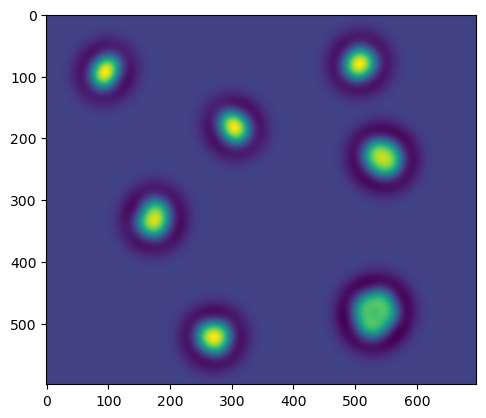

In [51]:
plt.imshow(data[6])

array([[  9, 232, 544],
       [  8, 523, 271],
       [  6,  93,  96],
       [  7,  80, 506],
       [  6, 183, 304],
       [  9, 331, 175],
       [  9, 483, 532]], dtype=int64)

In [371]:
np.save("fft_version", data)

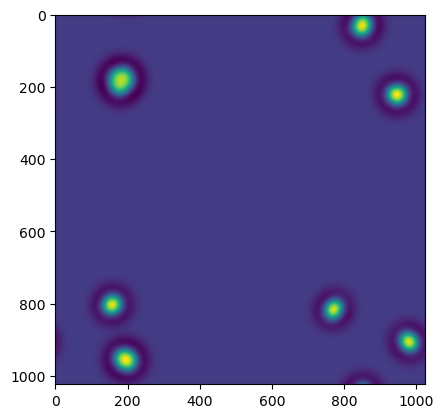

In [373]:
plt.imshow(data[9])

In [314]:
shifted = -fftshift(data, axes = (1, 2))

IndexError: tuple index out of range

In [358]:
shape = np.array([599, 697])
offset = ((np.array([1024, 1024]) - shape/2)).astype(int)

In [359]:
idxfunc = lambda u, v: -data[:, (offset[0] + u).astype(int) % 1024, (offset[1] + v).astype(int) % 1024]
idk = np.fromfunction(idxfunc, shape)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

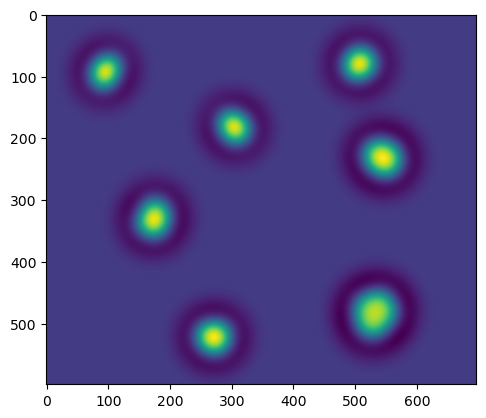

In [299]:
plt.imshow(idk[9])

In [271]:
ffted = shifted[:, offset[0]:offset[0] + shape[0], offset[1]:offset[1] + shape[1]]

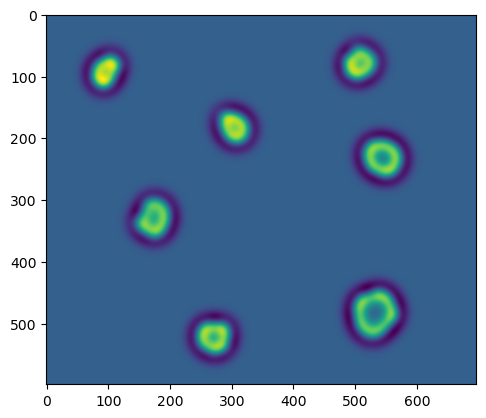

In [272]:
plt.imshow(ffted[0])

In [206]:
cube = np.moveaxis(np.load("cube.npy"), -1, 0)

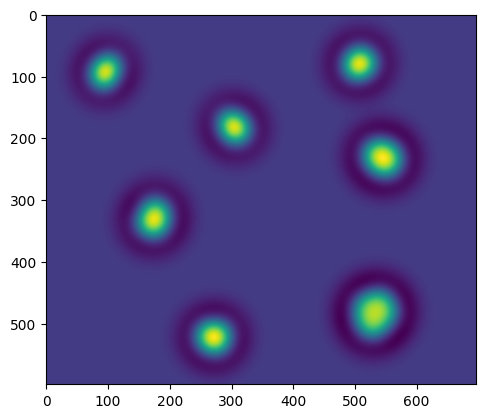

In [134]:
plt.imshow(data[9])

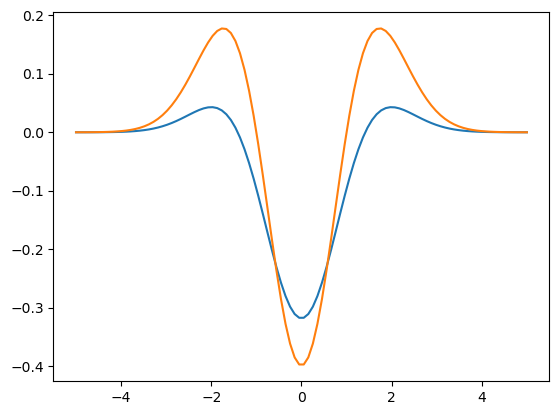

In [195]:
log = lambda x, y, sigma: -1/(np.pi*sigma**4) * (1-(x**2 + y**2)/(2*sigma**2))*np.exp(-(x**2+y**2)/(2*sigma**2))
def logr(r, sigma):
    # r2 = x**2 + y**2
    r2 = r**2
    sigma2 = sigma**2
    # r = np.sqrt(r2)
    upper = np.exp(-r2/(2*sigma2))*(r2-sigma2)
    lower = np.sqrt(2*np.pi)*sigma**5
    return upper/lower
def logxy(x, y, sigma):
    r = np.sqrt(x**2 + y**2)
    return logr(r, sigma)
idk = lambda r, sigma: -1/(np.pi*sigma**4) * (1-(r**2)/(2*sigma**2))*np.exp(-(r**2)/(2*sigma**2))
x = np.linspace(-5, 5, 100)
y = idk(x, 1)
y2 = logr(x, 1)
plt.plot(x, y)
plt.plot(x, y2)

In [353]:
peak_local_max(ffted, threshold_abs = 0.01, footprint=np.ones((3,) * (2 + 1)), exclude_border=(0, False, False))

array([[  9, 232, 544],
       [  8, 523, 271],
       [  6,  93,  96],
       [  7,  80, 506],
       [  6, 183, 304],
       [  9, 331, 175],
       [  9, 483, 532]], dtype=int64)

In [280]:
peak_local_max(cube, threshold_abs = 0, footprint=np.ones((3,) * (2 + 1)), exclude_border=(0, False, False))

array([[  9, 232, 544],
       [  8, 523, 271],
       [  6,  93,  96],
       [  7,  80, 506],
       [  6, 183, 304],
       [  9, 331, 175],
       [  9, 483, 532]], dtype=int64)

In [352]:
idk

array([[  6,  92,  95, 180],
       [  6, 182, 303, 179],
       [  7,  79, 505, 179],
       [  8, 522, 270, 183],
       [  9,  92,  95, 168],
       [  9, 330, 174, 176],
       [  9, 522, 270, 182],
       [  9, 182, 303, 171],
       [  9,  79, 506, 174],
       [  9, 482, 531, 160],
       [  9, 231, 543, 183]])

In [278]:
print(ffted[  9, 232, 544])
print(ffted[  8, 523, 271])
print(ffted[  6,  93,  96])
print(ffted[  7,  80, 506])
print(ffted[  6, 183, 304])
print(ffted[  9, 331, 175])
print(ffted[  9, 483, 532])

183.2652
183.19446
179.7084
179.1087
178.55765
175.71347
160.12256


array([[0.06253982, 0.06340599, 0.06272787],
       [0.06279922, 0.06369722, 0.06304163],
       [0.06131178, 0.06224579, 0.06161934]], dtype=float32)

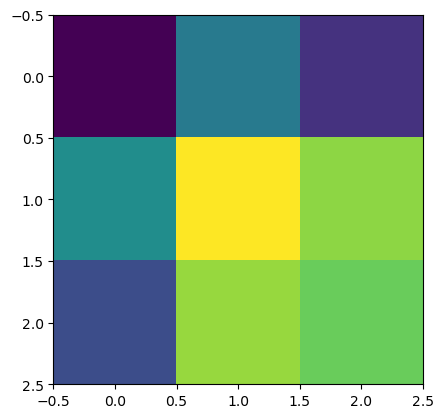

In [254]:
plt.imshow(ffted[8, 232 - 1: 232 + 2, 544 - 1: 544 + 2])

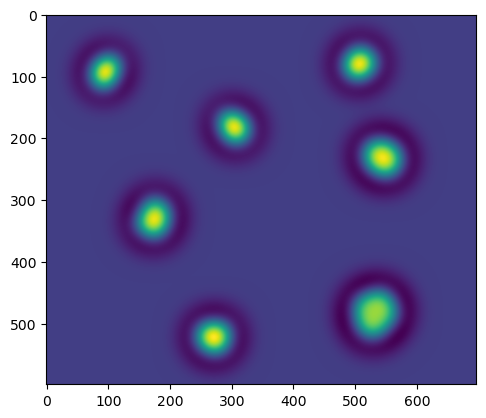

In [161]:
plt.imshow(data)

In [24]:
(~np.isnan(data)).any()

False

In [14]:
data.any()

True

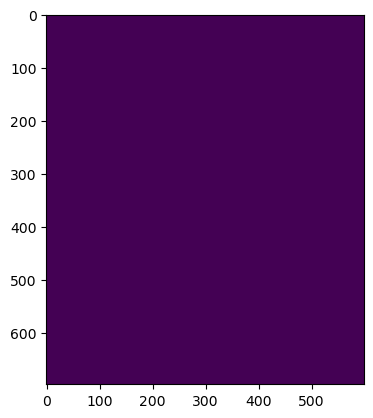

In [12]:
plt.imshow(data)

In [13]:
data

array([[[2147483647],
        [2147483647],
        [2147483647],
        ...,
        [2147483647],
        [2147483647],
        [2147483647]],

       [[2147483647],
        [2147483647],
        [2147483647],
        ...,
        [2147483647],
        [2147483647],
        [2147483647]],

       [[2147483647],
        [2147483647],
        [2147483647],
        ...,
        [2147483647],
        [2147483647],
        [2147483647]],

       ...,

       [[2147483647],
        [2147483647],
        [2147483647],
        ...,
        [2147483647],
        [2147483647],
        [2147483647]],

       [[2147483647],
        [2147483647],
        [2147483647],
        ...,
        [2147483647],
        [2147483647],
        [2147483647]],

       [[2147483647],
        [2147483647],
        [2147483647],
        ...,
        [2147483647],
        [2147483647],
        [2147483647]]])

In [225]:
found_in_first_sigma = data[data[:, 2].view("float32")/np.sqrt(2) == 10, :2]

In [233]:
found_in_first_sigma

array([[ 76,  79],
       [ 77,  79],
       [ 78,  79],
       ...,
       [485, 568],
       [486, 568],
       [487, 568]], dtype=int32)

In [241]:
pic = np.zeros((1024, 1024))

In [235]:
pic[found_in_first_sigma] = 1

In [240]:
found_in_first_sigma[:, 0]

array([ 76,  77,  78, ..., 485, 486, 487], dtype=int32)

In [242]:
pic[found_in_first_sigma[:, 0], found_in_first_sigma[:, 1]] = 1

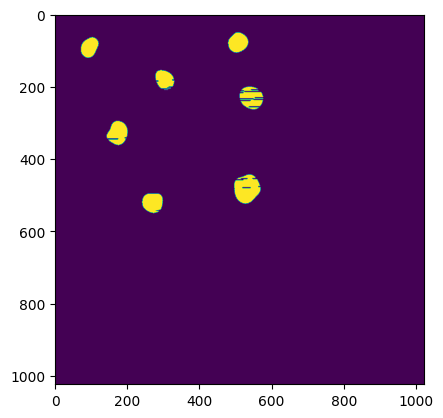

In [243]:
plt.imshow(pic)

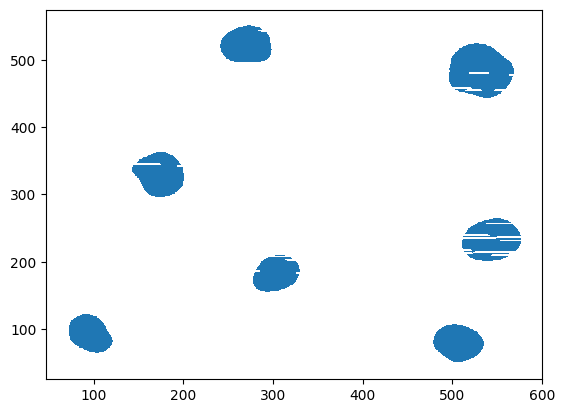

In [232]:
plt.plot(*found_in_first_sigma[:, ::-1].T, "")

In [205]:
data[:, 2:].view("float32")/np.sqrt(2)

array([[10.      , 58.509903],
       [10.      , 59.5172  ],
       [10.      , 60.597363],
       ...,
       [15.      , 30.294718],
       [15.      , 31.049526],
       [15.      , 31.647182]], dtype=float32)

In [192]:
np.unique(data[:, 2].view("float32")/np.sqrt(2))

array([ 0.      , 10.      , 11.      , 12.      , 12.999999, 14.000001,
       15.      , 16.      , 17.      , 18.      , 19.      ],
      dtype=float32)

In [172]:
data[:, 3].view("float32")/np.sqrt(2)

array([0.00028795, 0.00032908, 0.00037292, ..., 0.00089419, 0.00092521,
       0.00123945], dtype=float32)

In [37]:
data[:, :, 0]

array([[0.00058899, 0.00060345, 0.00061693, ..., 0.00054718, 0.00055913,
        0.00057604],
       [0.00060053, 0.00061522, 0.00062872, ..., 0.00055827, 0.00057038,
        0.00058758],
       [0.00061033, 0.00062529, 0.00063885, ..., 0.0005675 , 0.00057983,
        0.00059734],
       ...,
       [0.00054864, 0.00056227, 0.00057554, ..., 0.0005087 , 0.00052003,
        0.00053587],
       [0.00056359, 0.00057751, 0.00059087, ..., 0.00052297, 0.00053452,
        0.00055074],
       [0.00057689, 0.00059107, 0.00060449, ..., 0.00053571, 0.00054744,
        0.000564  ]], dtype=float32)

In [38]:
data.max()

72.42169

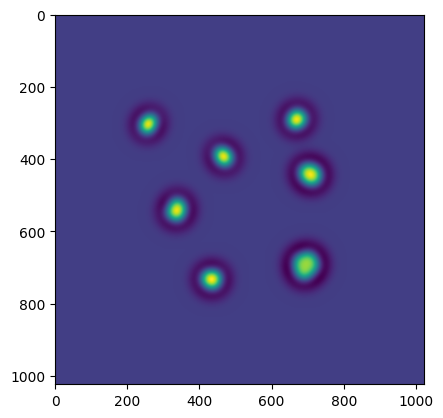

In [36]:
plt.imshow(data[:, :, 0])

In [68]:
data

0

In [66]:
pd.DataFrame(data).sort_values([0, 1])

,0,1
12758,2,96
14021,2,97
12528,2,98
13397,2,99
14401,2,100
...,...,...
6900,586,59
7334,586,60
7234,586,61
7074,586,62


In [47]:
data = data[data != 0]

In [40]:
(data != 0).sum() / len(data)

0.12489700672809537

In [48]:
data.reshape(-1, 4)

ValueError: cannot reshape array of size 417026 into shape (4)

In [93]:
output = pd.DataFrame(data, columns = ["frame", "x", "y", "mass", "r"])

In [97]:
output["y"].max()

109.07282257080078

In [96]:
output["x"].min()

-388.19671630859375

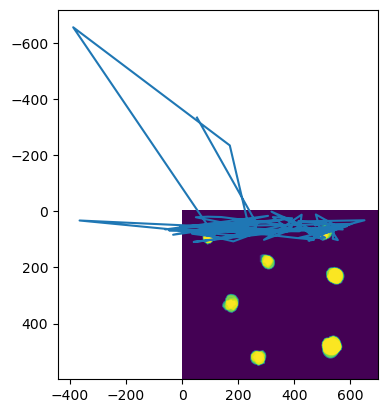

In [94]:
plt.imshow(image)
plt.plot(output["x"], output["y"])

In [6]:
errors = []
for (frame, my_subdf), (frame, tp_subdf) in zip(my_df.groupby("frame"), tp_df.groupby("frame")):
    idk = my_subdf.sort_values("y").reset_index(drop = True) - tp_subdf.sort_values("y").reset_index(drop = True)
    error = np.sqrt((idk[["y", "x"]]**2).sum(axis = 1)).sum()/len(my_subdf)
    if error > 1:
        errors.append((my_subdf, tp_subdf))
len(errors)

2000

In [7]:
it = iter(errors)

0 0


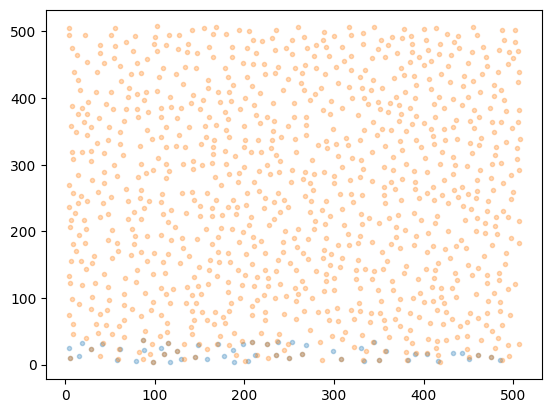

In [8]:
my_subdf, tp_subdf = next(it)
print(my_subdf["frame"].iloc[0], tp_subdf["frame"].iloc[0])
# my_coords = coords(my_df[my_df["frame"] == f])
# tp_coords = coords(tp_df[tp_df["frame"] == f])
my_coords = coords(my_subdf)
tp_coords = coords(tp_subdf)

my_tree = KDTree(my_coords.T)
tp_tree = KDTree(tp_coords.T)
# print(my_tree.query(tp_coords.T, distance_upper_bound = 0.2)[0].sum())
# print(tp_tree.query(my_coords.T, distance_upper_bound = 0.2)[0].sum())
plt.plot(*my_coords, "C0.", alpha = 0.3)
plt.plot(*tp_coords, "C1.", alpha = 0.3)
# plt.plot(idk[0], idk[1], ".")

In [20]:
idk[0], idk[1]

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [26]:
idk

(array([2.73705328e-06, 7.14660826e-06, 1.99054926e-06, ...,
        1.10177297e-05, 1.22248076e-05, 7.48332912e-06]),
 array([ 845,  901,  775, ...,  961, 1151,  427], dtype=int64))

In [85]:
tp_inds

(array([1, 7], dtype=int64),)

In [84]:
tp_coords.T[tp_inds]

array([[  4.59905321, 270.10897424],
       [  4.20060421, 235.99601816]])

In [87]:
tp_inds

(array([1, 7], dtype=int64),)

In [88]:
my_inds

(array([609, 864, 893], dtype=int64),)

In [48]:
np.isinf(my_dists)

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [9]:
(my_df.groupby("frame").count() - tp_df.groupby("frame").count()).abs().sum()

y       31
x       31
mass    31
dtype: int64

In [11]:
(my_df[["x", "y"]] > 511).sum()

x    2
y    2
dtype: int64

In [10]:
(my_df[["x", "y"]] < 0).sum()

x    4
y    1
dtype: int64

In [11]:
my_df

,frame,y,x,mass
0,0,8.867070,61.276859,1064.447632
1,0,9.230811,438.942505,993.463074
2,0,11.185135,227.674576,701.138489
3,0,11.741593,349.500702,811.161987
4,0,11.922229,341.975342,747.229126
...,...,...,...,...
644,0,497.107788,190.423584,787.688293
645,0,496.959900,248.419052,968.822021
646,0,498.052063,355.679932,802.113403
647,0,498.293976,392.127533,709.902344


In [19]:
tp.masks.gaussian_kernel(1, 4)[:, None]

array([[-0.99986617],
       [-0.99556814],
       [-0.94600887],
       [-0.75802855],
       [-0.60105653],
       [-0.75802855],
       [-0.94600887],
       [-0.99556814],
       [-0.99986617]])

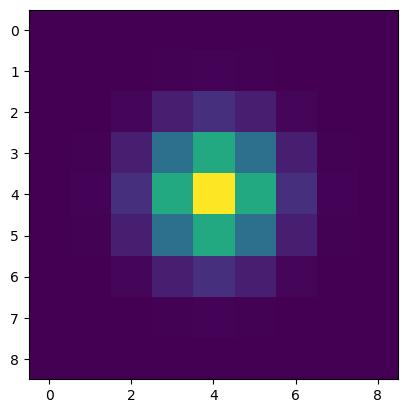

In [18]:
plt.imshow(tp.masks.gaussian_kernel(1, 4)[:, None] * tp.masks.gaussian_kernel(1, 4)[None, :])

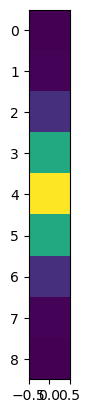

In [14]:
plt.imshow(tp.masks.gaussian_kernel(1, 4)[:, None])

In [10]:
print(len(my_df))
print(len(tp_df))

1151
1103


In [12]:

# my_tree.query_ball_tree(tp_tree, 0.05)

In [13]:
print((dists != np.inf).sum())
dists[dists != np.inf]
inds[dists != np.inf]
pass

948


In [15]:
it = enumerate(iter(coords(tp_df).T[dists == np.inf]))

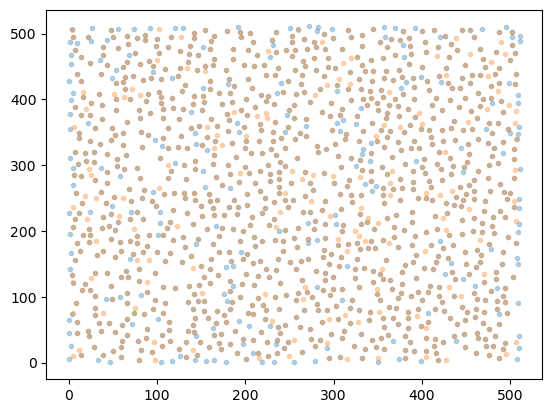

In [14]:
3//2

1

In [ ]:
tp_df

,y,x,mass
0,4.220573,74.692416,1054.478337
1,4.599053,270.108974,737.670025
2,4.623336,494.512906,1009.522685
3,5.025773,9.336279,922.702762
4,4.810352,121.785098,638.806371
...,...,...,...
1271,506.159615,181.958809,646.392449
1272,506.280800,214.909562,450.154686
1273,507.019594,339.288914,534.375697
1274,506.581047,381.735925,713.557145


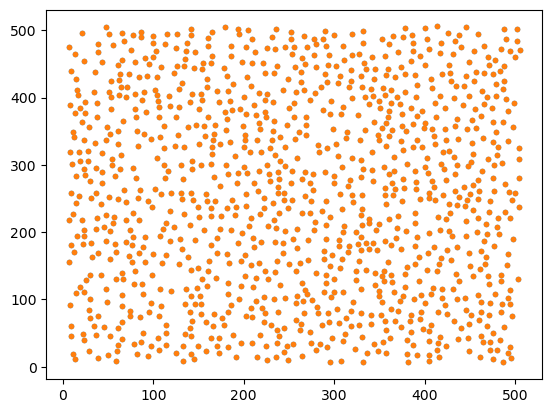

In [ ]:
plt.plot(*coords(my_df).T[inds[dists != np.inf]].T, ".", alpha = 1)
plt.plot(*coords(tp_df).T[dists != np.inf].T, ".", alpha = 1)